In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
cves = pd.read_csv('db/cves.csv')

In [53]:
cves.head()

,ID,Description,Published,CVSS,Severity,links,cwes,vendors,products
0,CVE-2023-0956,External input could be used on TEL-STER TelWi...,2023-08-03 15:15:10-04:00,7.5,HIGH,https://cert.pl/posts/2023/07/CVE-2023-0956/ \...,"[{'ID': 'CWE-22', 'href': 'http://cwe.mitre.or...",['tel-ster'],"['telwin_scada_webinterface, version : versio..."
1,CVE-2023-3329,SpiderControl SCADA Webserver versions 2.08 an...,2023-08-02 19:15:10-04:00,6.5,MEDIUM,https://www.cisa.gov/news-events/ics-advisorie...,"[{'ID': 'CWE-22', 'href': 'http://cwe.mitre.or...",['spidercontrol'],"['scadawebserver, version : versions up to (i..."
2,CVE-2023-2866,If an attacker can trick an authenticated user...,2023-06-07 17:15:13-04:00,7.8,HIGH,https://www.cisa.gov/news-events/ics-advisorie...,"[{'ID': 'CWE-345', 'href': 'http://cwe.mitre.o...",['advantech'],"['webaccess, version : 8.4.5']"
3,CVE-2023-2187,On Triangle MicroWorks' SCADA Data Gateway ver...,2023-06-07 03:15:08-04:00,5.3,MEDIUM,https://www.trellix.com/en-us/about/newsroom/s...,"[{'ID': 'NVD-CWE-noinfo', 'href': 'NA', 'name'...",['trianglemicroworks'],"['scada_data_gateway, version : versions up t..."
4,CVE-2023-2186,On Triangle MicroWorks' SCADA Data Gateway ver...,2023-06-07 03:15:08-04:00,9.8,CRITICAL,https://www.trellix.com/en-us/about/newsroom/s...,"[{'ID': 'CWE-134', 'href': 'http://cwe.mitre.o...",['trianglemicroworks'],"['scada_data_gateway, version : versions up t..."


In [54]:
#STATISTICS ABOUT THE SEVERITY OF THE VULNERABILITIES
cves['Severity'].value_counts()

Severity
HIGH        71
MEDIUM      50
CRITICAL    37
Name: count, dtype: int64

In [55]:
#STATISTICS ABOUT THE CVES PER YEAR
cves['Year'] = cves['Published'].str[:4]
cves['Year'].value_counts()

Year
2023    62
2022    48
2021    18
2020    16
2017     5
2007     3
2019     2
2015     1
2013     1
2011     1
2000     1
Name: count, dtype: int64

In [56]:
#STATISTICS ABOUT THE VENDORS
vendors = list(cves['vendors'])
vendors = [ast.literal_eval(vendor) for vendor in vendors if vendor != '[]']
vendors = [vendor for sublist in vendors for vendor in sublist]

In [57]:
vendors = pd.DataFrame(vendors, columns=['Vendor'])
vendors['Vendor'].value_counts()

Vendor
oracle                              18
schneider-electric                  11
contec                              10
br-automation                        8
measuresoft                          7
hornerautomation                     6
deltaww                              5
ge                                   5
libical_project                      4
emerson                              3
softing                              3
jtekt                                3
rockwellautomation                   3
ptc                                  3
softwaretoolbox                      3
microsoft                            2
iportalis                            2
jenzabar                             2
trianglemicroworks                   2
netscape                             1
checkpoint                           1
alcatel-lucent                       1
sdg                                  1
hospira                              1
tel-ster                             1
linux             

In [58]:
#STATISTICS ABOUT THE PRODUCTS
products = list(cves['products'])
products = [ast.literal_eval(product) for product in products if product != '[]']
products = [product for sublist in products for product in sublist]
products = [product.split(',')[0] for product in products]

In [59]:
products = pd.DataFrame(products_names, columns=['Product'])
products['Product'].value_counts()

Product
ecostruxure_geo_scada_expert_2019               87
ecostruxure_geo_scada_expert_2020               69
ecostruxure_geo_scada_expert_2021               27
ecostruxure_control_expert                      11
conprosys_hmi_system                            10
                                                ..
smartlink_hw-dp                                  1
cncsoft_screeneditor                             1
industrial_automation_commgr                     1
scadawebserver                                   1
omnitouch_8460_advanced_communication_server     1
Name: count, Length: 93, dtype: int64

In [78]:
#STATISTICS ABOUT THE CWE
cwes = list(cves['cwes'])
cwes = [ast.literal_eval(cwe) for cwe in cwes if cwe != '[]']
cwes = [cwe for sublist in cwes for cwe in sublist]
cwes = [cwe for cwe in cwes if (cwe['ID'] != 'NVD-CWE-noinfo' and cwe['ID'] != 'NVD-CWE-Other')]
cwes_names = [cwe['name'] for cwe in cwes]
cwes_ids = [cwe['ID'] for cwe in cwes]

In [120]:
cwes_ids = pd.DataFrame(cwes_ids, columns=['CWE'])
cwes_names = pd.DataFrame(cwes_names, columns=['CWE'])
cwes_ids['CWE'].value_counts()

CWE
CWE-787    10
CWE-22      7
CWE-798     7
CWE-416     7
CWE-345     6
           ..
CWE-799     1
CWE-502     1
CWE-305     1
CWE-331     1
CWE-122     1
Name: count, Length: 62, dtype: int64

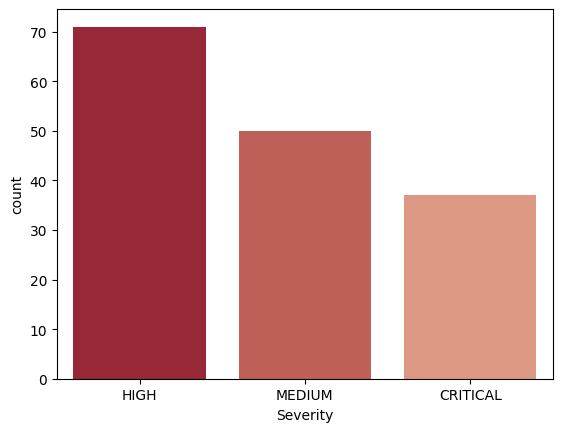

In [109]:
#GRAPHICAL REPRESENTATION OF THE SEVERITY OF THE VULNERABILITIES
sequential_colors = sns.color_palette("RdBu", 10)
sns.countplot(x='Severity', data=cves, palette=sequential_colors)
plt.show()

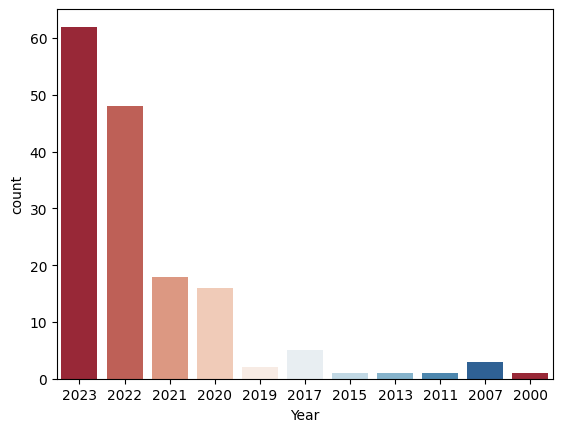

In [112]:
#GRAPHICAL REPRESENTATION OF THE CVES PER YEAR
sns.countplot(x='Year', data=cves, palette=sequential_colors)
plt.show()

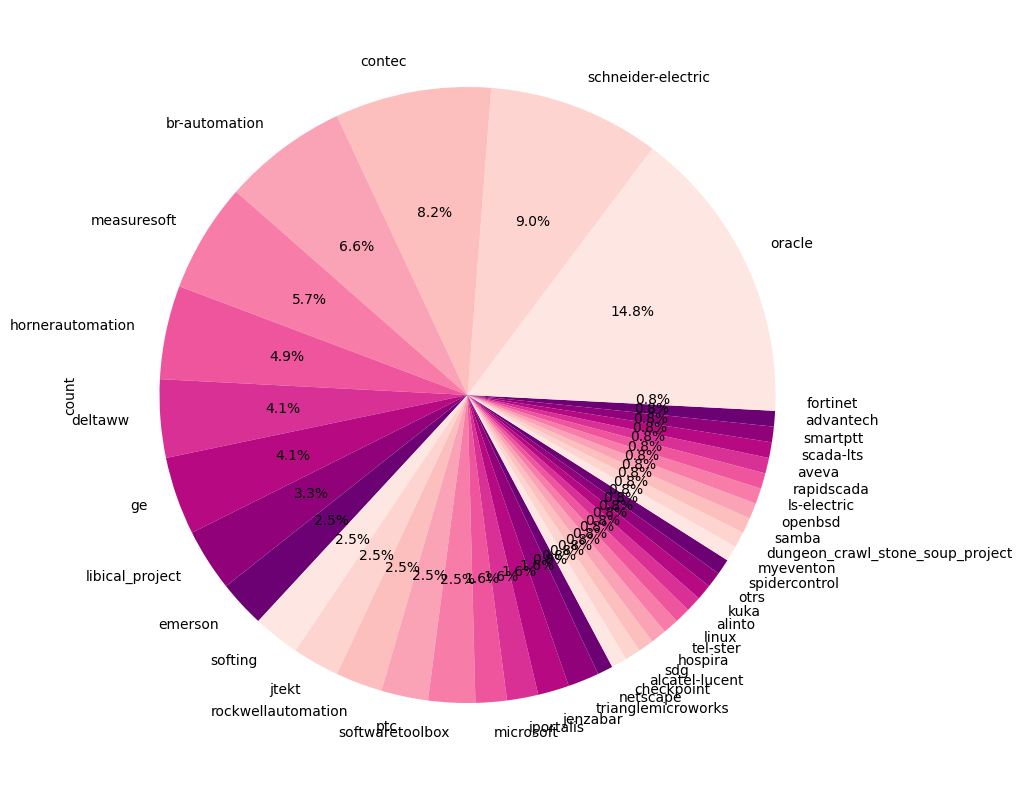

In [111]:
#GRAPHICAL REPRESENTATION OF THE VENDORS
vendors['Vendor'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10, 10))
plt.show()

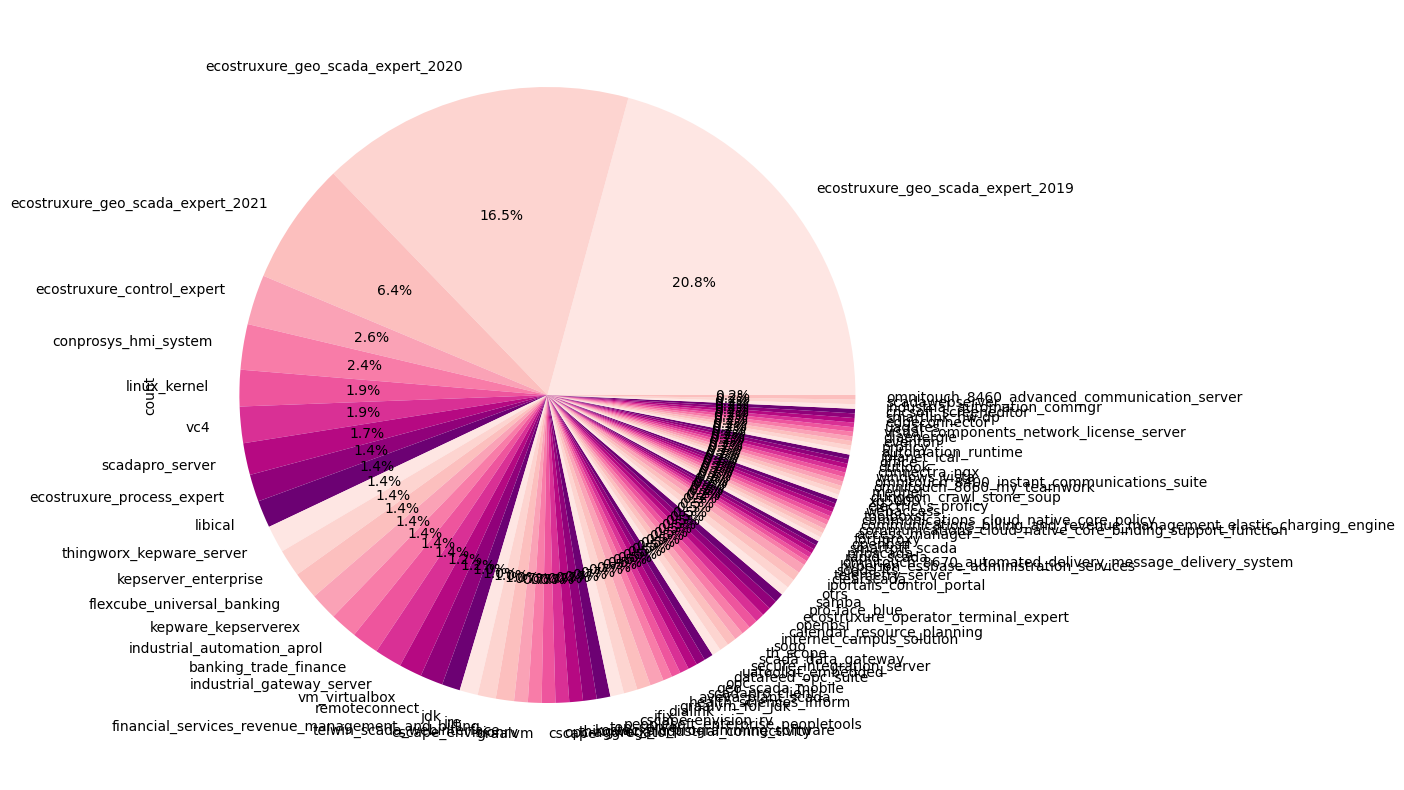

In [113]:
#GRAPHICAL REPRESENTATION OF THE PRODUCTS
products['Product'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10, 10))
plt.show()

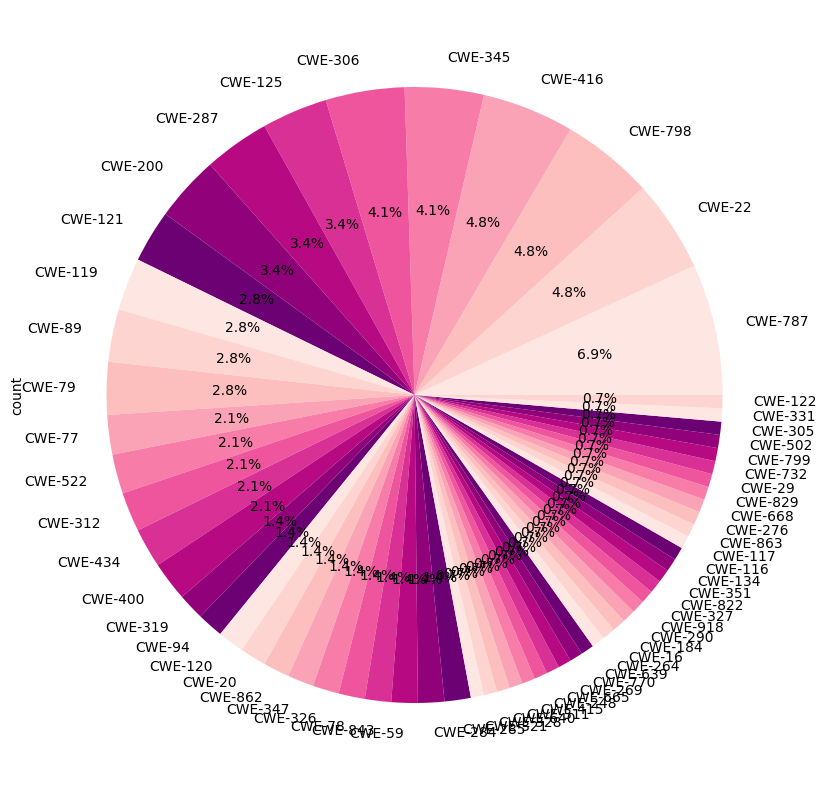

In [116]:
#GRAPHICAL REPRESENTATION OF THE CWES
cwes_ids['CWE'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10, 10))
plt.show()

CWE
Out-of-bounds Write                                                               10
Improper Limitation of a Pathname to a Restricted Directory ('Path Traversal')     7
Use of Hard-coded Credentials                                                      7
Use After Free                                                                     7
Insufficient Verification of Data Authenticity                                     6
Missing Authentication for Critical Function                                       6
Out-of-bounds Read                                                                 5
Improper Authentication                                                            5
Exposure of Sensitive Information to an Unauthorized Actor                         5
Stack-based Buffer Overflow                                                        4
Name: count, dtype: int64


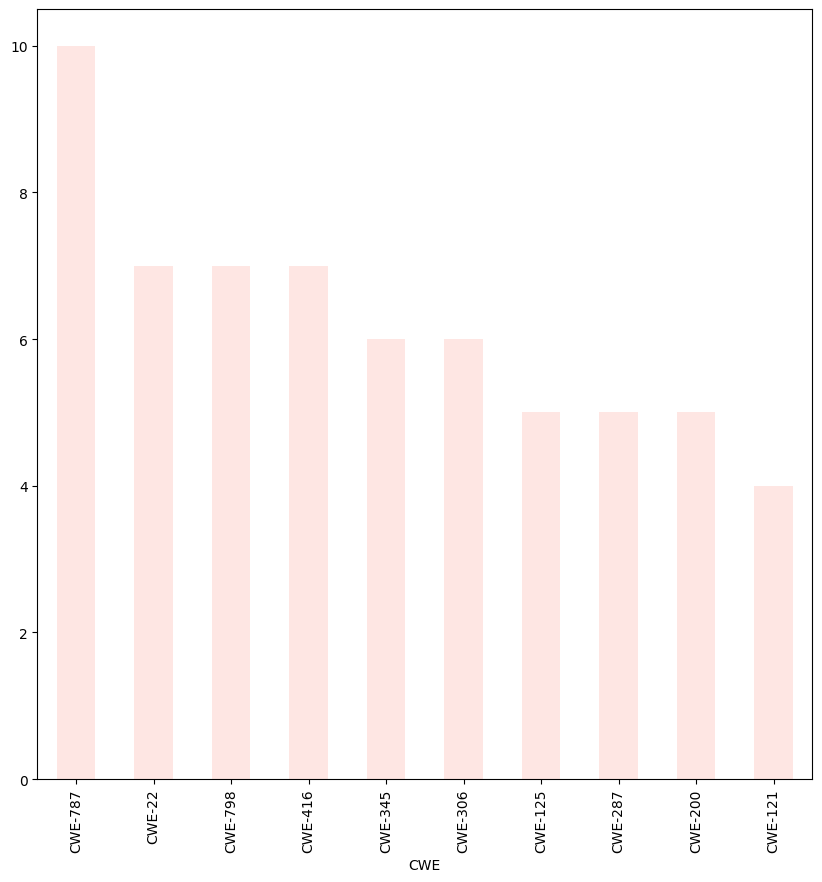

In [121]:
#TOP 10 CWES BY NUMBER OF CVES
cwes_ids['CWE'].value_counts().head(10).plot(kind='bar', figsize=(10, 10))
print(cwes_names['CWE'].value_counts().head(10))
plt.show()

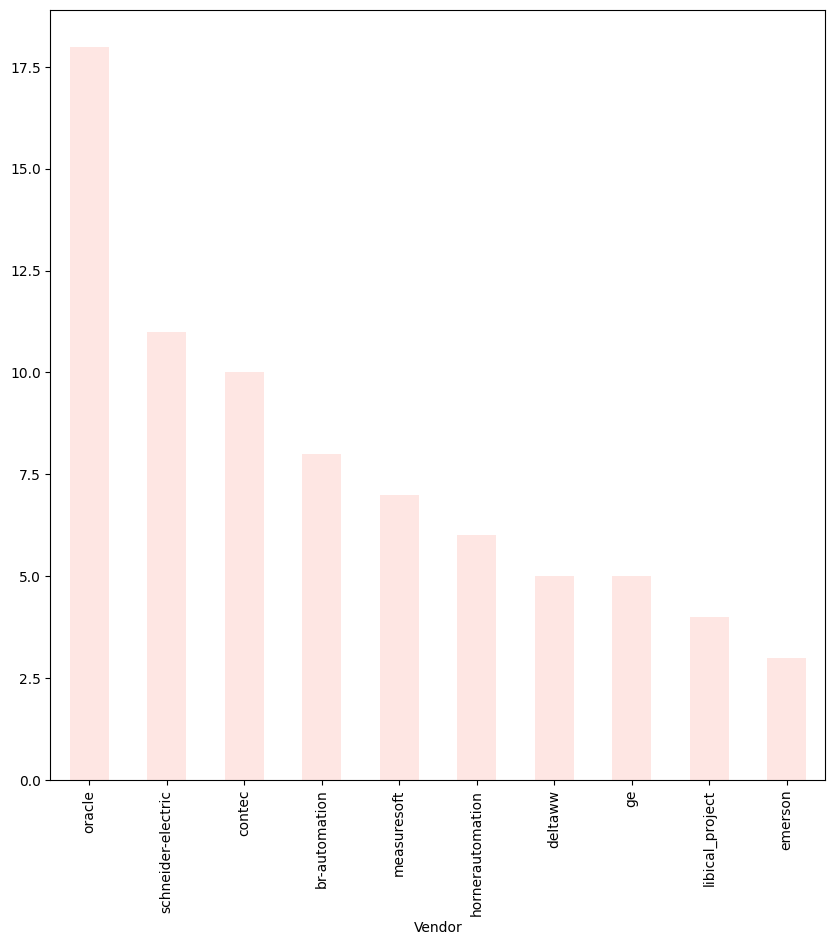

In [118]:
#TOP 10 VENDORS BY NUMBER OF CVES
vendors['Vendor'].value_counts().head(10).plot(kind='bar', figsize=(10, 10))
plt.show()